In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud
from collections import Counter
import random

In [2]:
df=pd.read_csv('Tweets.csv') 

In [3]:
df[['tweet_id', 'text']].head(20)

,tweet_id,text
0,570306133677760513,@VirginAmerica What @dhepburn said.
1,570301130888122368,@VirginAmerica plus you've added commercials t...
2,570301083672813571,@VirginAmerica I didn't today... Must mean I n...
3,570301031407624196,@VirginAmerica it's really aggressive to blast...
4,570300817074462722,@VirginAmerica and it's a really big bad thing...
5,570300767074181121,@VirginAmerica seriously would pay $30 a fligh...
6,570300616901320704,"@VirginAmerica yes, nearly every time I fly VX..."
7,570300248553349120,@VirginAmerica Really missed a prime opportuni...
8,570299953286942721,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,570295459631263746,"@VirginAmerica it was amazing, and arrived an ..."


In [4]:
structured_df=pd.DataFrame()

structured_df['id']=df['tweet_id']
structured_df['raw_text']=df['text']
structured_df['label']=df['airline_sentiment']


structured_df['length']=df['text'].apply(len)
structured_df['has_url']=df['text'].apply(lambda x:1 if re.search(r'http\S+|www.\S+', x) else 0)
structured_df['has_mention'] =df['text'].apply(lambda x: 1 if re.search(r'@\w+', x) else 0)
structured_df['has_hashtag'] =df['text'].apply(lambda x: 1 if re.search(r'#\w+', x) else 0)


structured_df['lang']='en'

In [5]:
print("--- Text Statistics ---")
print(f"Min Length: {structured_df['length'].min()}")
print(f"Max Length: {structured_df['length'].max()}")
print(f"Avg Length: {structured_df['length'].mean():.2f}")

print("\n--- Symbol Frequency ---")
print(f"Tweets with URLs: {structured_df['has_url'].sum()}")
print(f"Tweets with Mentions: {structured_df['has_mention'].sum()}")
print(f"Tweets with Hashtags: {structured_df['has_hashtag'].sum()}")

--- Text Statistics ---
Min Length: 12
Max Length: 186
Avg Length: 103.82

--- Symbol Frequency ---
Tweets with URLs: 1177
Tweets with Mentions: 14640
Tweets with Hashtags: 2375


In [6]:
stop_words=set(stopwords.words('english'))

In [7]:
def clean_and_tokenize(text):
    text=re.sub(r'[^a-z\s]','',text.lower())
    tokens=word_tokenize(text)
    return " ".join([w for w in tokens if w not in stop_words])

structured_df['cleaned_text']=structured_df['raw_text'].apply(clean_and_tokenize)

structured_df[['raw_text', 'cleaned_text']].head(10)

,raw_text,cleaned_text
0,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said
1,@VirginAmerica plus you've added commercials t...,virginamerica plus youve added commercials exp...
2,@VirginAmerica I didn't today... Must mean I n...,virginamerica didnt today must mean need take ...
3,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...
4,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing
5,@VirginAmerica seriously would pay $30 a fligh...,virginamerica seriously would pay flight seats...
6,"@VirginAmerica yes, nearly every time I fly VX...",virginamerica yes nearly every time fly vx ear...
7,@VirginAmerica Really missed a prime opportuni...,virginamerica really missed prime opportunity ...
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",virginamerica well didntbut
9,"@VirginAmerica it was amazing, and arrived an ...",virginamerica amazing arrived hour early youre...


In [8]:
sample_corpus = structured_df['cleaned_text'].head(1000)

In [9]:
onehot_encod=CountVectorizer(binary=True,max_features=10)
onehot_data=onehot_encod.fit_transform(sample_corpus)


In [10]:
bow_vec=CountVectorizer(binary=False,max_features=10)
bow_data = bow_vec.fit_transform(sample_corpus)

In [11]:
tfidf_vec = TfidfVectorizer(max_features=10)
tfidf_data = tfidf_vec.fit_transform(sample_corpus)

In [12]:
print("--- TF-IDF Sample Output ---")
print(pd.DataFrame(tfidf_data.toarray(), columns=tfidf_vec.get_feature_names_out()).head())

--- TF-IDF Sample Output ---
   flight  flights  get  help   im      need  service  thanks  united  \
0     0.0      0.0  0.0   0.0  0.0  0.000000      0.0     0.0     0.0   
1     0.0      0.0  0.0   0.0  0.0  0.000000      0.0     0.0     0.0   
2     0.0      0.0  0.0   0.0  0.0  0.925793      0.0     0.0     0.0   
3     0.0      0.0  0.0   0.0  0.0  0.000000      0.0     0.0     0.0   
4     0.0      0.0  0.0   0.0  0.0  0.000000      0.0     0.0     0.0   

   virginamerica  
0       1.000000  
1       1.000000  
2       0.378032  
3       1.000000  
4       1.000000  


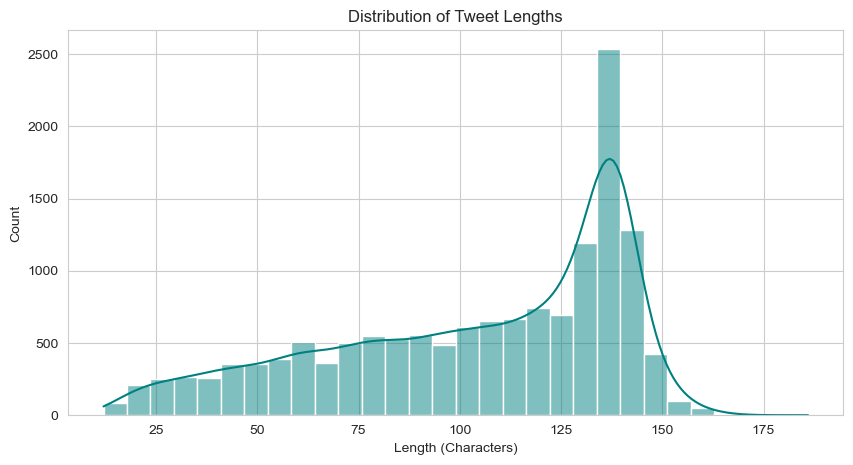

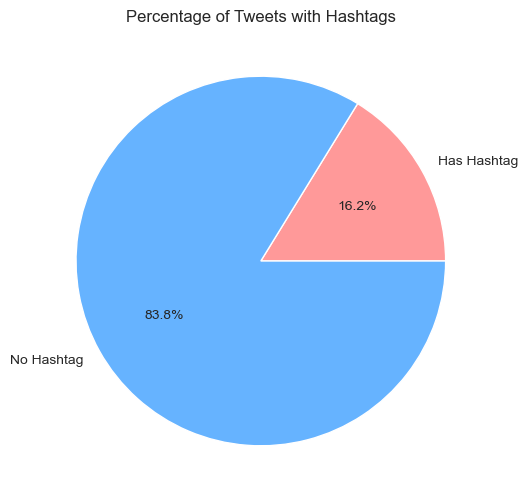

In [13]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(structured_df['length'], bins=30, kde=True, color='teal')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Length (Characters)')
plt.show()

plt.figure(figsize=(6, 6))
labels = ['Has Hashtag', 'No Hashtag']
sizes  = [structured_df['has_hashtag'].sum(), len(structured_df)-structured_df['has_hashtag'].sum()]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title('Percentage of Tweets with Hashtags')
plt.show()

In [14]:
X = structured_df['cleaned_text']
y = structured_df['label']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
tfidf = TfidfVectorizer(max_features=5000) 

In [17]:
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

In [18]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [19]:
y_pred = model.predict(X_test_vec)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy:.2%}")

✅ Model Accuracy: 80.36%


In [21]:
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))


--- Classification Report ---
              precision    recall  f1-score   support

    negative       0.83      0.94      0.88      1889
     neutral       0.69      0.49      0.57       580
    positive       0.80      0.63      0.71       459

    accuracy                           0.80      2928
   macro avg       0.77      0.69      0.72      2928
weighted avg       0.80      0.80      0.79      2928



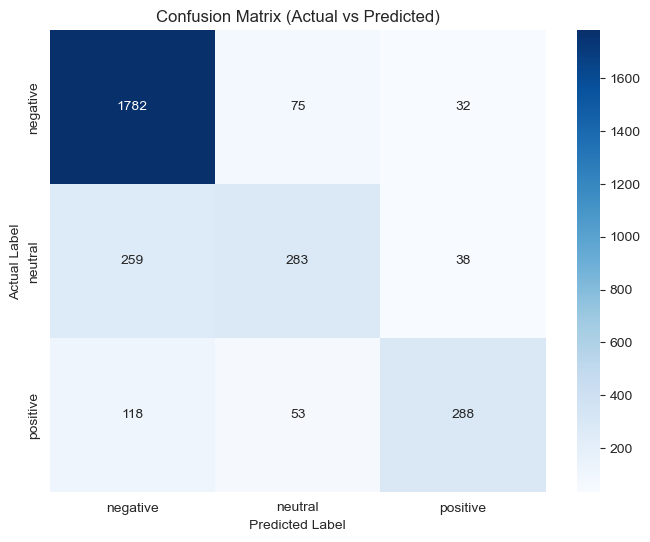

In [22]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix (Actual vs Predicted)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [23]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)
sentiment_colors = {"negative": "#E74C3C", "neutral": "#95A5A6", "positive": "#2ECC71"}

In [24]:
sentiment_counts = df['airline_sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

color_map = {"negative": "#E74C3C", "neutral": "#95A5A6", "positive": "#2ECC71"}

fig = px.pie(sentiment_counts, 
             values='Count', 
             names='Sentiment', 
             title='Overall Distribution of Sentiments (Interactive)',
             color='Sentiment',
             color_discrete_map=color_map,
             hole=0.4, 
             hover_data=['Count'])

fig.update_traces(textposition='inside', textinfo='percent+label')

# عرض الرسم
fig.show()

In [27]:

airline_sentiment_pct = pd.crosstab(df['airline'], df['airline_sentiment'], normalize='index') * 100

# Reorder columns to ensure logical flow (Negative -> Neutral -> Positive)
airline_sentiment_pct = airline_sentiment_pct[['negative', 'neutral', 'positive']]

# Convert to "Long Format" which Plotly loves
# This turns the table into columns: [airline, Sentiment, Percentage]
plot_data = airline_sentiment_pct.reset_index().melt(
    id_vars='airline', 
    var_name='Sentiment', 
    value_name='Percentage'
)

# 2. Define Colors (Using your specific palette)
color_map = {"negative": "#E74C3C", "neutral": "#95A5A6", "positive": "#2ECC71"}

# 3. Create the Chart
fig = px.bar(plot_data, 
             x='airline', 
             y='Percentage', 
             color='Sentiment',
             title='Sentiment Percentage by Airline (Interactive)',
             color_discrete_map=color_map,
             # Force the legend and stacking order
             category_orders={"Sentiment": ["negative", "neutral", "positive"]})

# 4. Add the 50% Reference Line
fig.add_hline(y=50, line_dash="dash", line_color="grey", opacity=0.7, annotation_text="50% Mark")

# 5. Update Layout for better aesthetics
fig.update_layout(
    yaxis_title="Percentage (%)",
    xaxis_title="Airline",
    legend_title="Sentiment Type",
    hovermode="x unified" # Shows all sentiments for the airline when hovering
)

fig.show()

Generating Word Clouds... (Takes a few seconds)


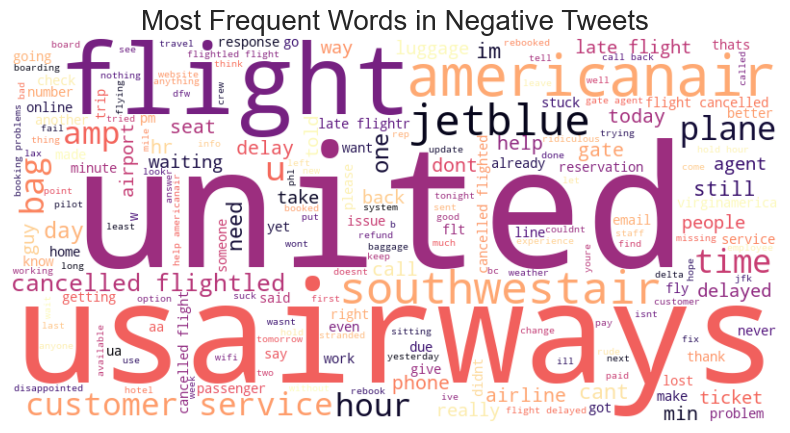

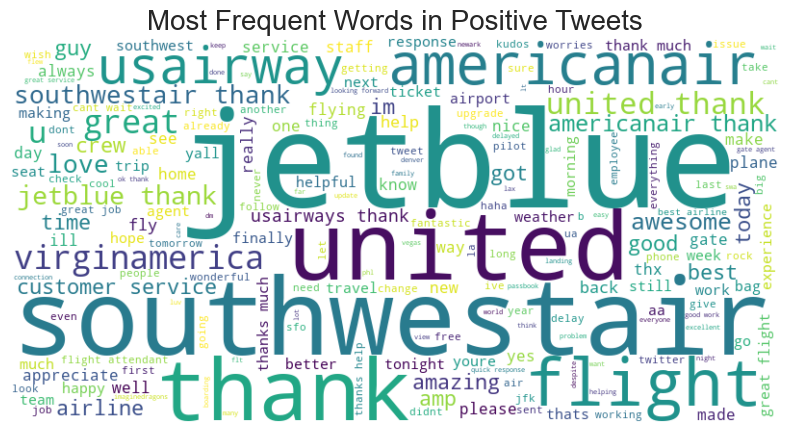

In [26]:

def plot_wordcloud(sentiment_type, title, define_color):
    all_text = " ".join(structured_df[structured_df['label'] == sentiment_type]['cleaned_text'])
    
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=define_color).generate(all_text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off') # إخفاء المحاور
    plt.title(title, fontsize=20)
    plt.show()

print("Generating Word Clouds... (Takes a few seconds)")

plot_wordcloud('negative', 'Most Frequent Words in Negative Tweets', 'magma')

plot_wordcloud('positive', 'Most Frequent Words in Positive Tweets', 'viridis')

In [31]:
def plotly_wordcloud(sentiment_type, title, color_scale):
    all_text = " ".join(structured_df[structured_df['label'] == sentiment_type]['cleaned_text'])
    
    words = all_text.split()
    word_counts = Counter(words).most_common(50)
    
    words_df = pd.DataFrame(word_counts, columns=['word', 'count'])
    
    words_df['x'] = [random.random() for _ in range(len(words_df))]
    words_df['y'] = [random.random() for _ in range(len(words_df))]
    
    fig = px.scatter(words_df, 
                     x='x', 
                     y='y', 
                     size='count',      
                     color='count',     
                     text='word',       
                     title=title,
                     color_continuous_scale=color_scale,
                     size_max=50)       
    
    fig.update_traces(textposition='top center', marker=dict(opacity=0.5))
    fig.update_layout(
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        plot_bgcolor='white',
        hovermode='closest'
    )
    
    fig.show()

print("Generating Interactive Word Clouds...")

# 1. Negative (Magma Colors)
plotly_wordcloud('negative', 'Top Words in Negative Tweets (Interactive)', px.colors.sequential.Magma)

# 2. Positive (Viridis Colors)
plotly_wordcloud('positive', 'Top Words in Positive Tweets (Interactive)', px.colors.sequential.Viridis)

Generating Interactive Word Clouds...
